In [2]:
import pandas as pd
from tqdm.auto import tqdm

# Load the data
file_path = 'MPS LSOA Level Crime (Historical).csv'
data = pd.read_csv(file_path, delimiter=',', encoding='utf-8')

# Show the head of the dataframe
data_head = data.head()
print(data_head)

# Describe the dataframe without the 'datetime_is_numeric' argument
data_description = data.describe(include='all')
print(data_description)

   LSOA Code                  LSOA Name               Borough  \
0  E01000006  Barking and Dagenham 016A  Barking and Dagenham   
1  E01000006  Barking and Dagenham 016A  Barking and Dagenham   
2  E01000006  Barking and Dagenham 016A  Barking and Dagenham   
3  E01000006  Barking and Dagenham 016A  Barking and Dagenham   
4  E01000006  Barking and Dagenham 016A  Barking and Dagenham   

              Major Category                   Minor Category  201903  201904  \
0  Arson and Criminal Damage                            Arson       1       0   
1  Arson and Criminal Damage                  Criminal Damage       1       2   
2                   Burglary  Burglary Business and Community       0       0   
3                   Burglary                Domestic Burglary       1       0   
4              Drug Offences                 Drug Trafficking       0       0   

   201905  201906  201907  ...  202101  202102  202103  202104  202105  \
0       0       0       0  ...       0       0  

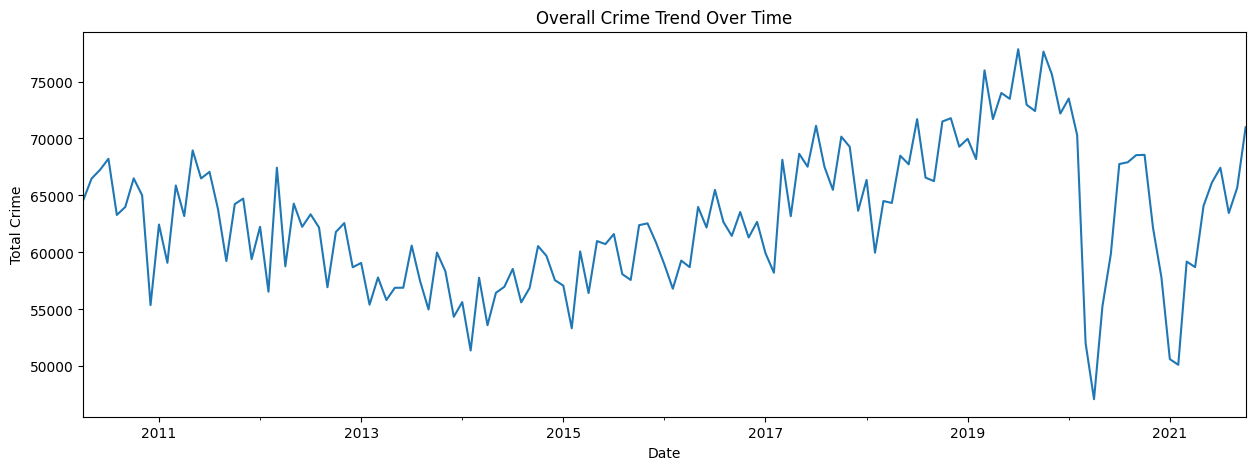

In [7]:
# Import matplotlib.pyplot with the common alias 'plt'
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

# Re-run the plotting code
# Correcting the list of monthly columns to exclude 'Total Crime'
monthly_columns = data.columns[5:-1]  # Exclude the last column which is 'Total Crime'

# Calculate the overall crime trend
overall_crime_trend = data[monthly_columns].sum()

# Convert the index to datetime to help with plotting
overall_crime_trend.index = pd.to_datetime(overall_crime_trend.index, format='%Y%m')

# Sort the index to ensure the dates are in order
overall_crime_trend.sort_index(inplace=True)

# Plot the overall crime trend
plt.figure(figsize=(15, 5))
overall_crime_trend.plot(title='Overall Crime Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Crime')
plt.show()

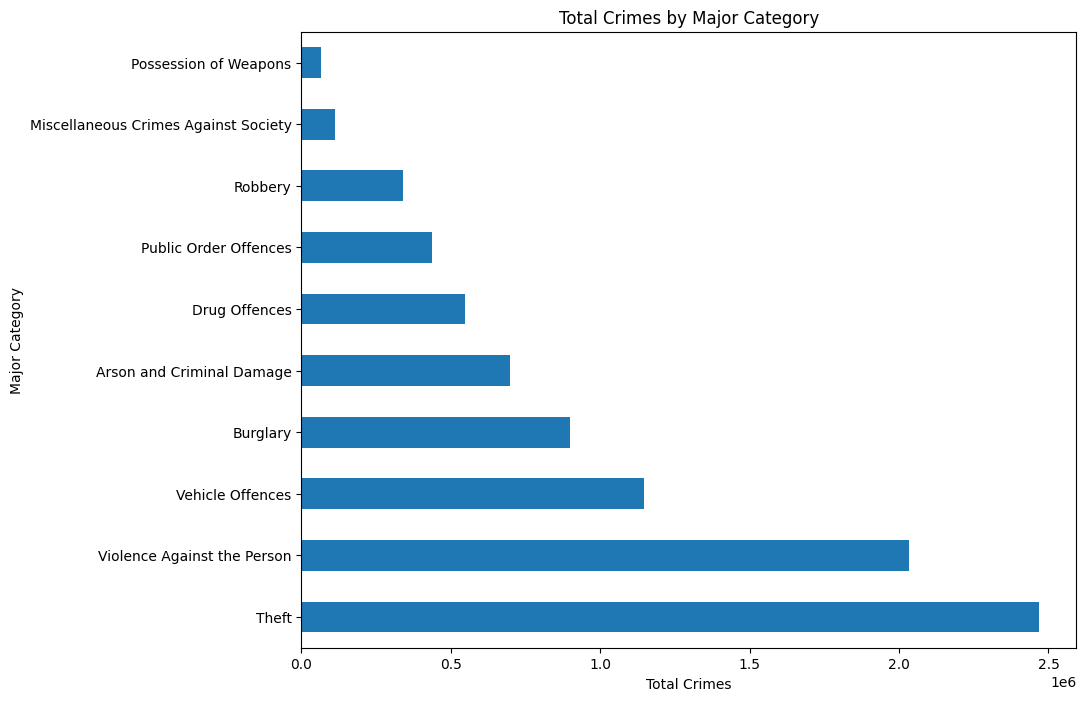

In [8]:
# Calculate the total crime for each major category across all months
major_category_totals = data.groupby('Major Category')[monthly_columns].sum().sum(axis=1)

# Sort the totals in descending order to see which categories have the most crimes
major_category_totals_sorted = major_category_totals.sort_values(ascending=False)

# Plot the total crimes for each major category
plt.figure(figsize=(10, 8))
major_category_totals_sorted.plot(kind='barh', title='Total Crimes by Major Category')
plt.xlabel('Total Crimes')
plt.ylabel('Major Category')
plt.show()

<Figure size 2000x1000 with 0 Axes>

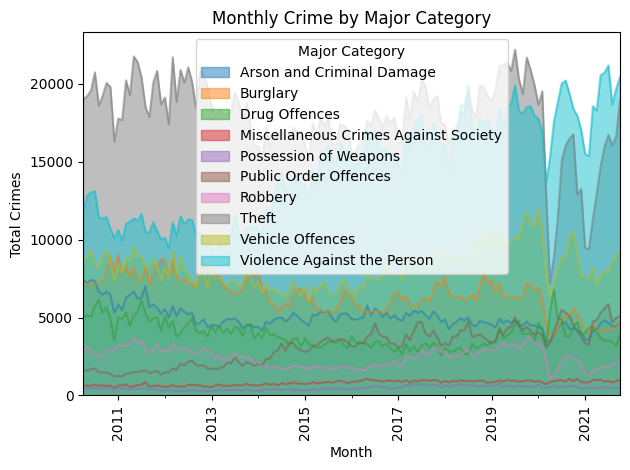

In [12]:
# Plot the stacked area chart for better visualization of the monthly crime by major category
plt.figure(figsize=(20, 10))
monthly_crime_by_category.plot(kind='area', stacked=False, title='Monthly Crime by Major Category')
plt.xlabel('Month')
plt.ylabel('Total Crimes')
plt.legend(title='Major Category')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit the labels
plt.show()

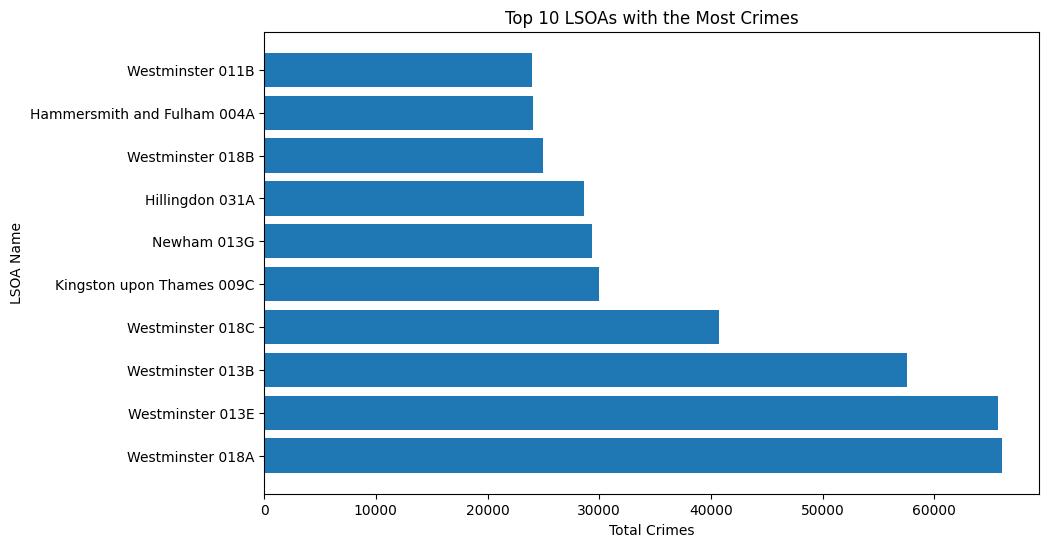

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('MPS LSOA Level Crime (Historical).csv')
monthly_columns = data.columns[6:]

data['Total Crimes'] = data[monthly_columns].sum(axis=1)
total_crimes_by_lsoa = data.groupby('LSOA Name')['Total Crimes'].sum().reset_index()
sorted_crimes_by_lsoa = total_crimes_by_lsoa.sort_values(by='Total Crimes', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(sorted_crimes_by_lsoa['LSOA Name'].head(10), sorted_crimes_by_lsoa['Total Crimes'].head(10))
plt.xlabel('Total Crimes')
plt.ylabel('LSOA Name')
plt.title('Top 10 LSOAs with the Most Crimes')
plt.show()

In [7]:
# Calculate the correlation between different types of crimes
crime_types = data.columns[6:]
correlation_matrix = data[crime_types].corr()
correlation_matrix

,201904,201905,201906,201907,201908,201909,201910,201911,201912,202001,...,202102,202103,202104,202105,202106,202107,202108,202109,202110,Total Crimes
201904,1.000000,0.887806,0.864849,0.832003,0.800395,0.827879,0.851311,0.855261,0.845532,0.841709,...,0.309611,0.349049,0.511748,0.635905,0.652127,0.719805,0.724226,0.725093,0.807555,0.869999
201905,0.887806,1.000000,0.876814,0.859604,0.827109,0.851546,0.863881,0.867986,0.861535,0.842899,...,0.355881,0.391922,0.554555,0.660915,0.699759,0.757994,0.751907,0.748466,0.813027,0.902164
201906,0.864849,0.876814,1.000000,0.871806,0.845658,0.850508,0.868167,0.868340,0.872501,0.843013,...,0.363180,0.398015,0.567757,0.679935,0.708582,0.766148,0.745376,0.749707,0.822436,0.894327
201907,0.832003,0.859604,0.871806,1.000000,0.853346,0.850383,0.861021,0.855877,0.855052,0.832535,...,0.397365,0.431947,0.591212,0.690819,0.721228,0.769102,0.762986,0.760834,0.810418,0.896334
201908,0.800395,0.827109,0.845658,0.853346,1.000000,0.845146,0.844171,0.833660,0.833726,0.814559,...,0.396120,0.428038,0.569158,0.663866,0.693733,0.748716,0.745431,0.744050,0.778097,0.877389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202107,0.719805,0.757994,0.766148,0.769102,0.748716,0.758451,0.766810,0.771551,0.759952,0.755157,...,0.454683,0.500622,0.656849,0.731808,0.772757,1.000000,0.790662,0.771836,0.797291,0.823390
202108,0.724226,0.751907,0.745376,0.762986,0.745431,0.757548,0.761136,0.761221,0.741316,0.754687,...,0.464217,0.504597,0.635547,0.708159,0.743335,0.790662,1.000000,0.792493,0.789571,0.819240
202109,0.725093,0.748466,0.749707,0.760834,0.744050,0.757238,0.762177,0.762079,0.737394,0.750875,...,0.448182,0.489241,0.628251,0.711407,0.730951,0.771836,0.792493,1.000000,0.802813,0.818013
202110,0.807555,0.813027,0.822436,0.810418,0.778097,0.795137,0.823036,0.834072,0.823462,0.818340,...,0.393214,0.439651,0.615779,0.732339,0.754839,0.797291,0.789571,0.802813,1.000000,0.860607


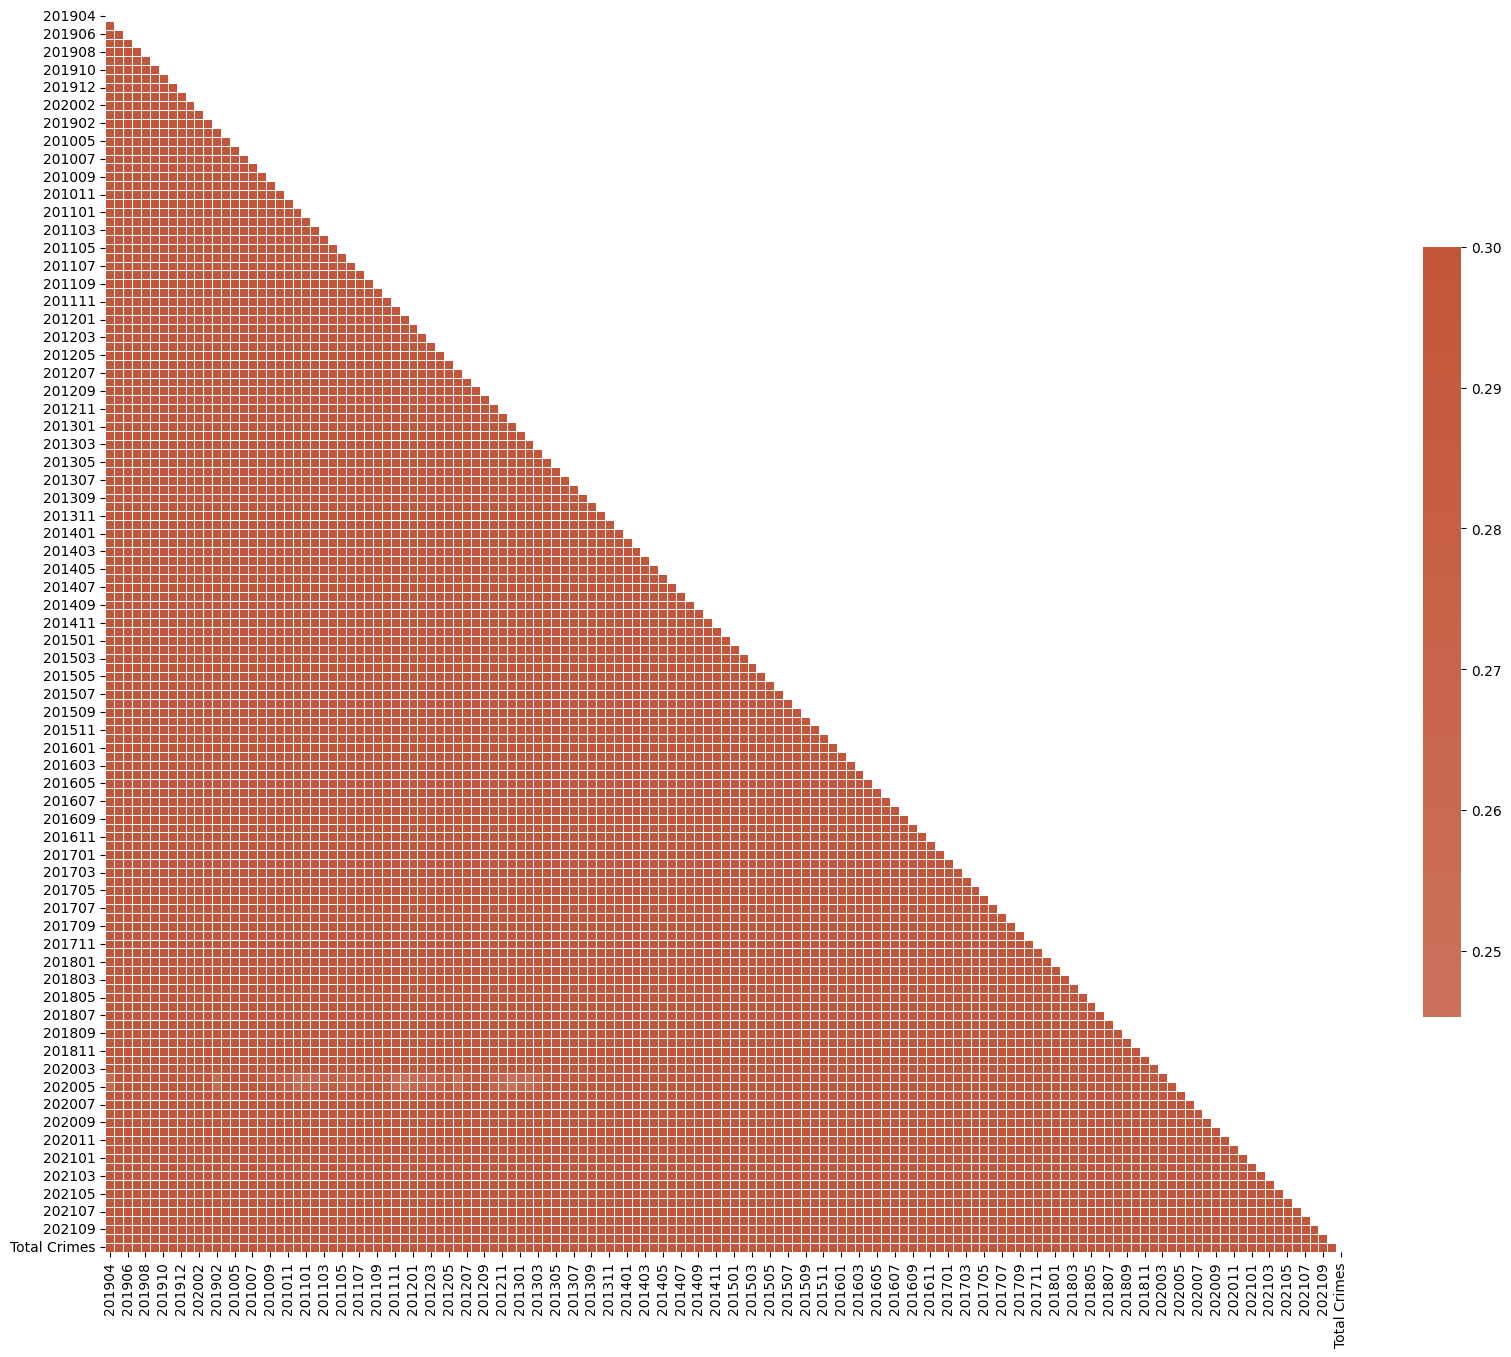

In [11]:
import numpy as np
import seaborn as sns

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(20, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

In [12]:
# Impact of covid-19 lockdown
# Calculate the total crimes in 2019 and 2020 by selecting the columns for each year
monthly_columns_2019 = [col for col in data.columns if '2019' in col]
monthly_columns_2020 = [col for col in data.columns if '2020' in col]

total_crimes_2019 = data[monthly_columns_2019].sum().sum()
total_crimes_2020 = data[monthly_columns_2020].sum().sum()

# Display the total crimes for each year
total_crimes_2019, total_crimes_2020

(881960, 750875)

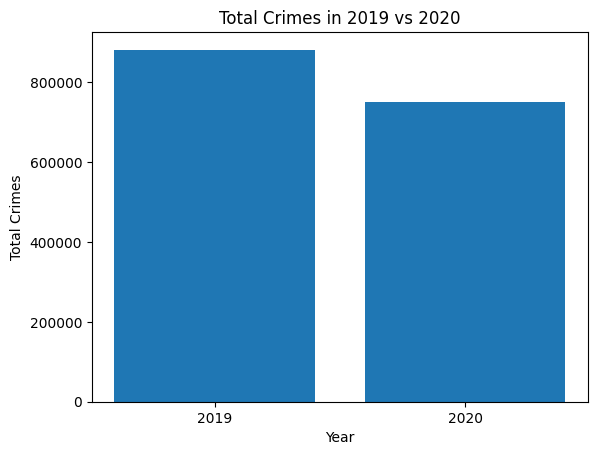

In [13]:
import matplotlib.pyplot as plt

# Calculate the total crimes in 2019 and 2020 by selecting the columns for each year
monthly_columns_2019 = [col for col in data.columns if '2019' in col]
monthly_columns_2020 = [col for col in data.columns if '2020' in col]

total_crimes_2019 = data[monthly_columns_2019].sum().sum()
total_crimes_2020 = data[monthly_columns_2020].sum().sum()

# Create a bar plot to visualize the total crimes for each year
plt.bar(['2019', '2020'], [total_crimes_2019, total_crimes_2020])
plt.title('Total Crimes in 2019 vs 2020')
plt.xlabel('Year')
plt.ylabel('Total Crimes')
plt.show()

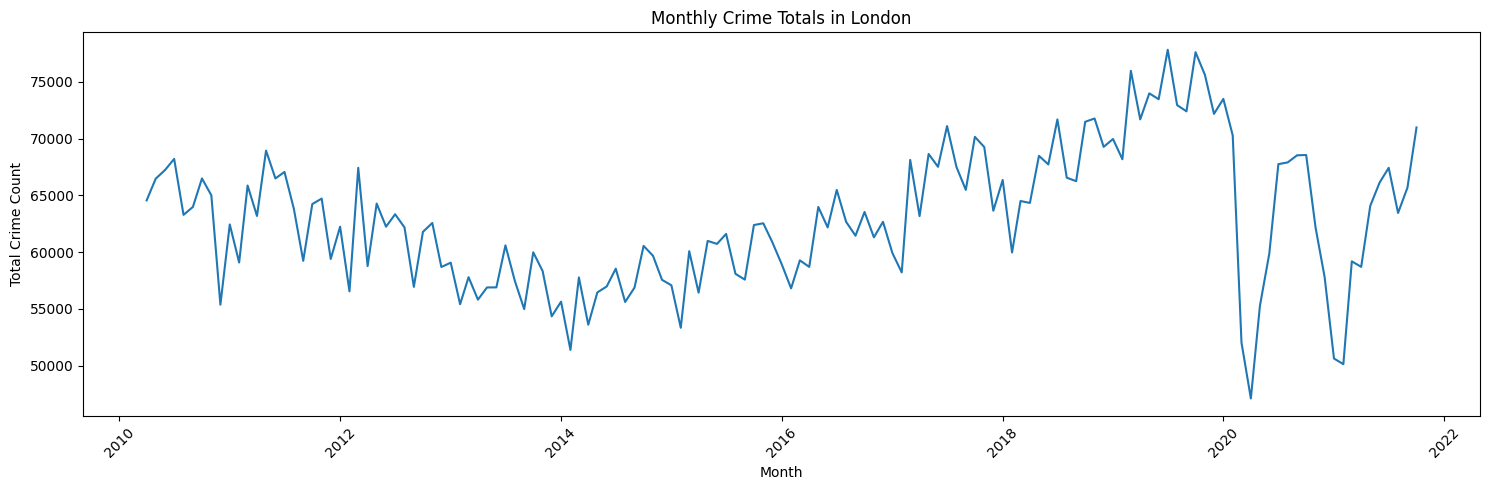

In [15]:
# Reshape the data to have a single 'Month' column
import pandas as pd
from tqdm.notebook import tqdm

# Load the data
file_path = 'MPS LSOA Level Crime (Historical).csv'
data = pd.read_csv(file_path)

# Melt the dataframe to convert the month columns into rows
monthly_data = data.melt(id_vars=['LSOA Code', 'LSOA Name', 'Borough', 'Major Category', 'Minor Category'], 
                         var_name='Month', value_name='Crime Count')

# Convert 'Month' to datetime
monthly_data['Month'] = pd.to_datetime(monthly_data['Month'], format='%Y%m')

# Aggregate the data by month to get the total crimes per month
monthly_totals = monthly_data.groupby('Month')['Crime Count'].sum().reset_index()

# Plotting the monthly crime totals to observe seasonal patterns
plt.figure(figsize=(15, 5))
plt.plot(monthly_totals['Month'], monthly_totals['Crime Count'])
plt.title('Monthly Crime Totals in London')
plt.xlabel('Month')
plt.ylabel('Total Crime Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

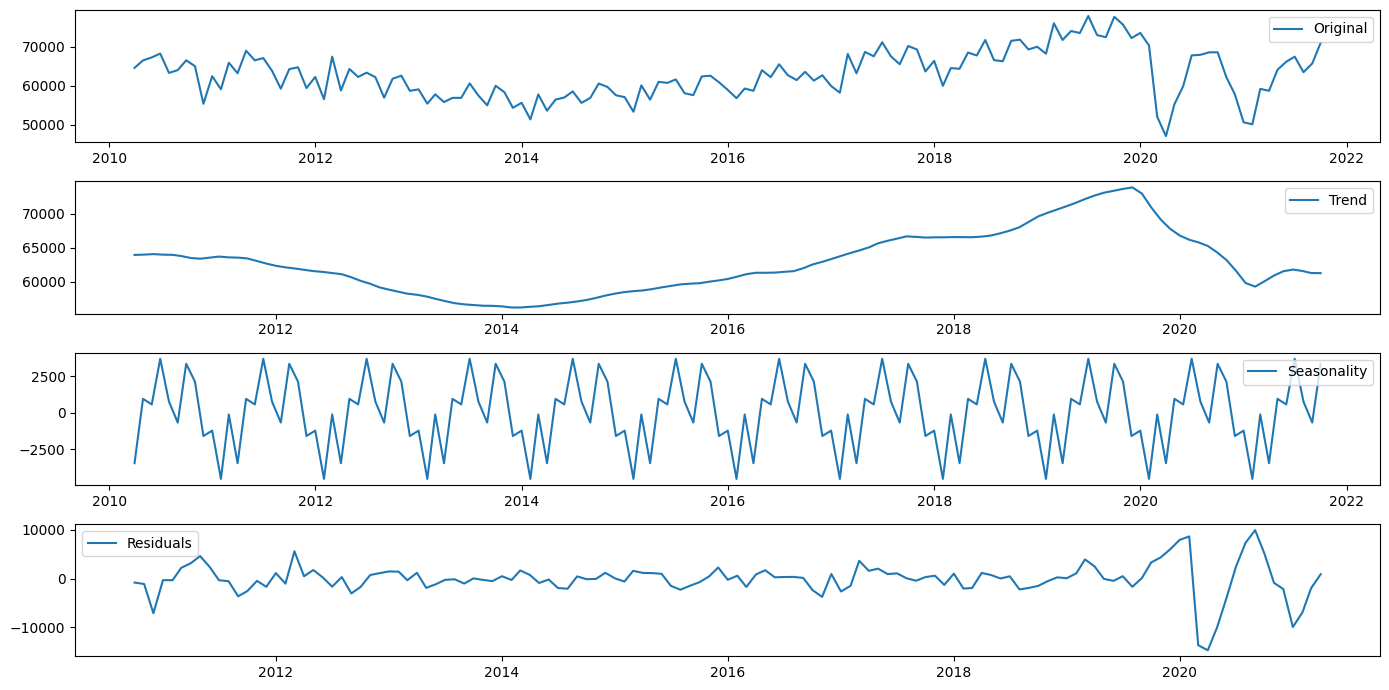

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Perform seasonal decomposition of the time series data
# Assuming total_crimes_df is the dataframe containing the monthly crime totals

decomposition = seasonal_decompose(monthly_totals['Crime Count'], model='additive', period=12)

# Plot the original data, trend, seasonality, and residuals
plt.figure(figsize=(14, 7))
plt.subplot(411)
plt.plot(monthly_totals['Month'], monthly_totals['Crime Count'], label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(monthly_totals['Month'], decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(monthly_totals['Month'], decomposition.seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(monthly_totals['Month'], decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

# Show the plots
plt.show()